In [1]:
!python ../src/utils.py

Traceback (most recent call last):
  File "/home/bothsides/projects/optimizing_DEDx_estimator/notebooks/../src/utils.py", line 7, in <module>
    from analysis import tree
  File "/home/bothsides/projects/optimizing_DEDx_estimator/src/analysis.py", line 21, in <module>
    df_filtered = df.Filter(
                  ^^^^^^^^^^
  File "/opt/root-6.32.14/lib/ROOT/_pythonization/_rdf_pyz.py", line 321, in _PyFilter
    return rdf._OriginalFilter(callable_or_str, *args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Template method resolution failed:
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(string_view expression, string_view name = "") =>
    TypeError: takes at most 2 arguments (3 given)
  Failed to instantiate "Filter(std::string,std::string,std::string)"


In [2]:
%reload_ext autoreload

In [3]:
import os
import math
import ROOT as rt
import numpy as np
import matplotlib.pyplot as plt
import utils 
from ROOT import VecOps
from analysis import (df, df_filtered, tree, HMNCSBR, TRUNCSBR, COLOR_MAP)

name_tag = str(utils.TAG)
print("cwd:", os.getcwd())


TypeError: Template method resolution failed:
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(string_view expression, string_view name = "") =>
    TypeError: takes at most 2 arguments (3 given)
  Failed to instantiate "Filter(std::string,std::string,std::string)"

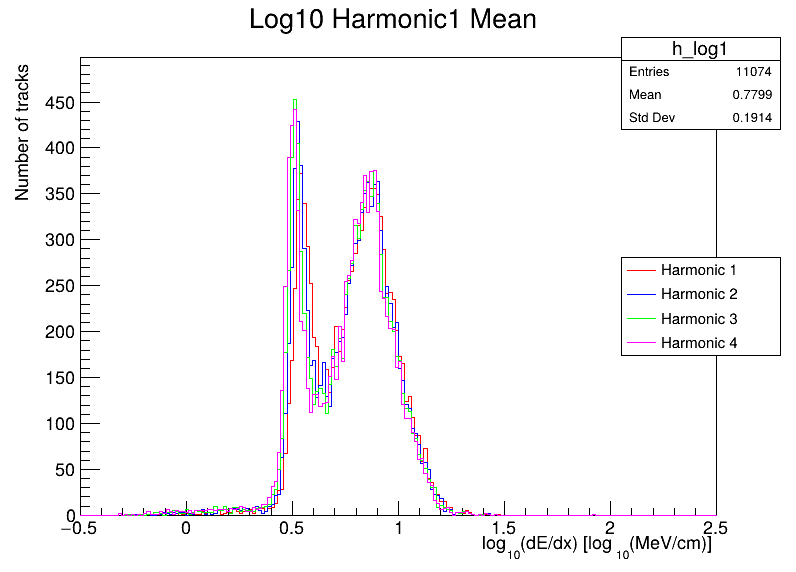

In [ ]:

df_with_log = df
for i, branch in enumerate(HMNCSBR):
    df_with_log = df_with_log.Define(f"log10_{branch}", f"log10({branch})")


c = rt.TCanvas("log_h2_canvas_overlay", "Log10(dE/dx) Harmonic Means", 800, 600)
c.SetLogy()
leg = rt.TLegend(0.78, 0.38, 0.98, 0.55)

hists_harm_log = {}  # dictionary to hold log10 histogram names for harmonic means

for i, branch in enumerate(HMNCSBR):
    log_branch = f"log10_{branch}"

    # Define the histogram with log10 range
    
    hists_harm_log[f"h_log{i+1}"] = df_with_log.Histo1D((f"h_log{i+1}", "", 200, -0.5, 2.5), log_branch)
    
    hists_harm_log[f"h_log{i+1}"].SetLineColor(COLOR_MAP[i+1])
    hists_harm_log[f"h_log{i+1}"].SetTitle(f"Log10 Harmonic{i+1} Mean")
    hists_harm_log[f"h_log{i+1}"].GetXaxis().SetTitle("log_{10}(dE/dx) [log_{10}(MeV/cm)]")
    hists_harm_log[f"h_log{i+1}"].GetYaxis().SetTitle("Number of tracks")
    
    hists_harm_log[f"h_log{i+1}"].Draw("same")
    leg.AddEntry(hists_harm_log[f"h_log{i+1}"].GetPtr(), f"Harmonic {i+1}", "l")


max_vals_log = [h.GetMaximum() for h in hists_harm_log.values()]
overall_max_log = max(max_vals_log)
list(hists_harm_log.values())[0].SetMaximum(overall_max_log * 1.1)

leg.Draw()
c.Draw()

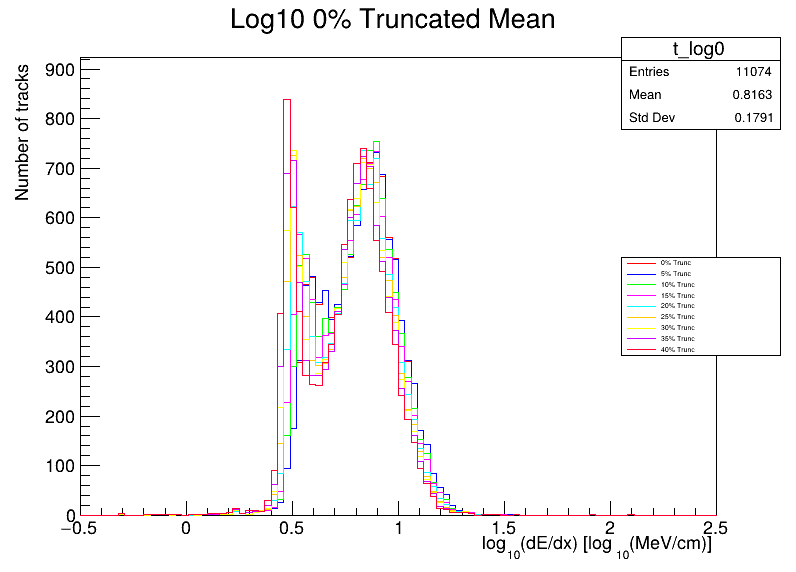

In [ ]:
# Defining new columns with log10 transformations for truncated means
df_with_log_trunc = df_with_log  
for i, branch in enumerate(TRUNCSBR):
    df_with_log_trunc = df_with_log_trunc.Define(f"log10_{branch}", f"log10({branch})")

# Create log10(dE/dx) histograms for truncated means
c_trunc_log = rt.TCanvas("log_trunc_canvas_overlay", "Log10(dE/dx) Truncated Means", 800, 600)
c_trunc_log.SetLogy()
leg_trunc = rt.TLegend(0.78, 0.38, 0.98, 0.55)

hists_trunc_log = {}  # dictionary for truncated means log10 histograms

for i, branch in enumerate(TRUNCSBR):
    log_branch = f"log10_{branch}"
    
    hists_trunc_log[f"t_log{5*i}"] = df_with_log_trunc.Histo1D((f"t_log{5*i}", "", 100, -0.5, 2.5), log_branch)
    
    hists_trunc_log[f"t_log{5*i}"].SetLineColor(COLOR_MAP[i+1])
    hists_trunc_log[f"t_log{5*i}"].SetTitle(f"Log10 {5*i}% Truncated Mean")
    hists_trunc_log[f"t_log{5*i}"].GetXaxis().SetTitle("log_{10}(dE/dx) [log_{10}(MeV/cm)]")
    hists_trunc_log[f"t_log{5*i}"].GetYaxis().SetTitle("Number of tracks")
    
    hists_trunc_log[f"t_log{5*i}"].Draw("same")
    leg_trunc.AddEntry(hists_trunc_log[f"t_log{5*i}"].GetPtr(), f"{5*i}% Trunc", "l")


max_vals_trunc_log = [h.GetMaximum() for h in hists_trunc_log.values()]
overall_max_trunc_log = max(max_vals_trunc_log)
list(hists_trunc_log.values())[0].SetMaximum(overall_max_trunc_log * 1.1)

leg_trunc.Draw()
c_trunc_log.Draw()

# Individual Log10 Harmonic Mean Histograms

This section shows individual log10(dE/dx) histograms for each harmonic mean estimator.

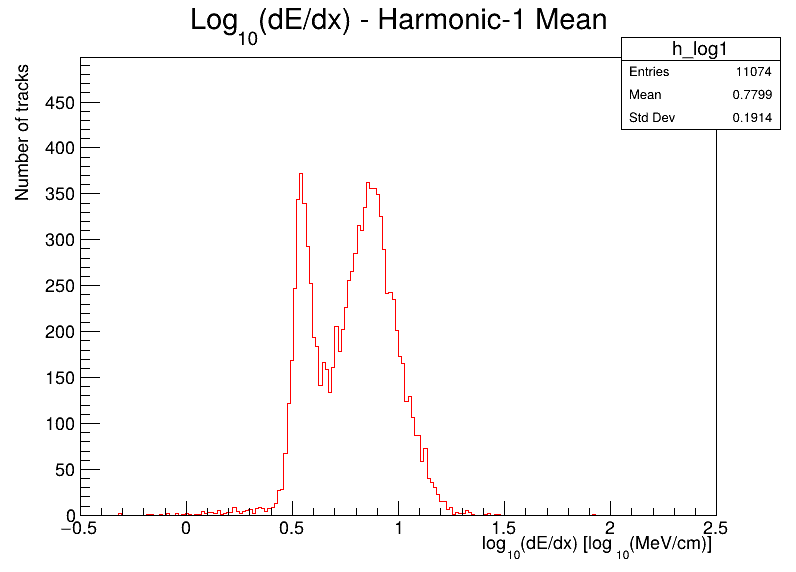

In [ ]:
# Log10 Harmonic-1 Mean (Arithmetic Mean)
c_h1_log = rt.TCanvas("h1_log_canvas", "Log10 Harmonic-1 Mean", 800, 600)

h1_log = hists_harm_log["h_log1"]
h1_log.SetLineColor(rt.kRed)
h1_log.SetTitle("Log_{10}(dE/dx) - Harmonic-1 Mean")
h1_log.GetXaxis().SetTitle("log_{10}(dE/dx) [log_{10}(MeV/cm)]")
h1_log.GetYaxis().SetTitle("Number of tracks")

# Enable statistics
rt.gStyle.SetOptStat("nemr")
h1_log.Draw("hist")

c_h1_log.Draw()

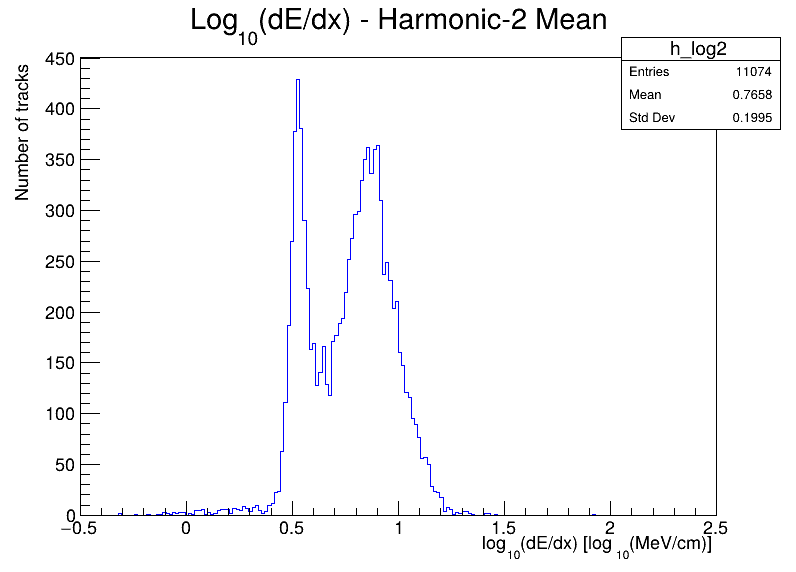

In [ ]:
# Log10 Harmonic-2 Mean  
c_h2_log = rt.TCanvas("h2_log_canvas", "Log10 Harmonic-2 Mean", 800, 600)

h2_log = hists_harm_log["h_log2"]
h2_log.SetLineColor(rt.kBlue)
h2_log.SetTitle("Log_{10}(dE/dx) - Harmonic-2 Mean")
h2_log.GetXaxis().SetTitle("log_{10}(dE/dx) [log_{10}(MeV/cm)]")
h2_log.GetYaxis().SetTitle("Number of tracks")

# Enable statistics
rt.gStyle.SetOptStat("nemr")
h2_log.Draw("hist")

c_h2_log.Draw()

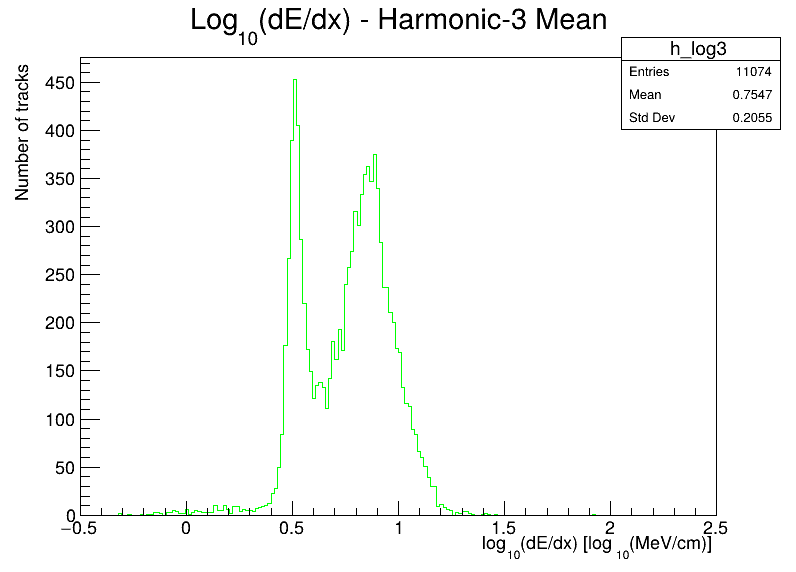

In [ ]:
# Log10 Harmonic-3 Mean
c_h3_log = rt.TCanvas("h3_log_canvas", "Log10 Harmonic-3 Mean", 800, 600)

h3_log = hists_harm_log["h_log3"]
h3_log.SetLineColor(rt.kGreen)
h3_log.SetTitle("Log_{10}(dE/dx) - Harmonic-3 Mean")
h3_log.GetXaxis().SetTitle("log_{10}(dE/dx) [log_{10}(MeV/cm)]")
h3_log.GetYaxis().SetTitle("Number of tracks")

# Enable statistics
rt.gStyle.SetOptStat("nemr")
h3_log.Draw("hist")

c_h3_log.Draw()

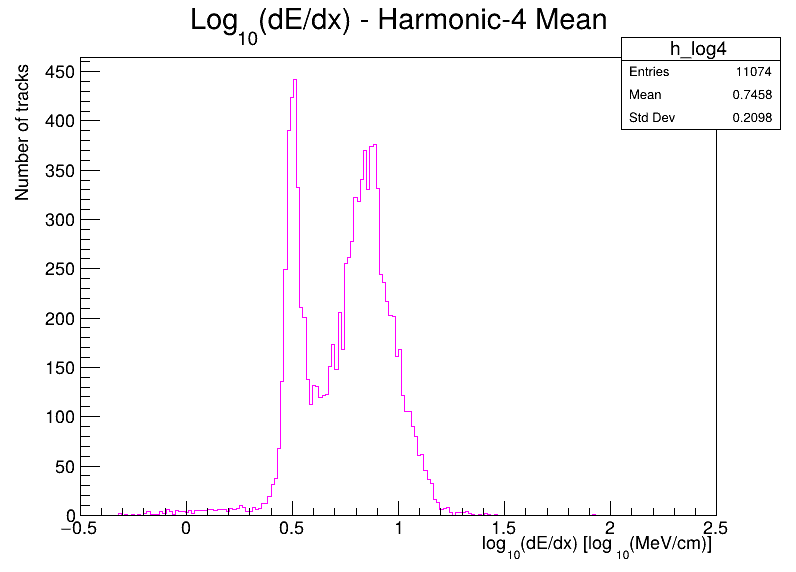

In [ ]:
# Log10 Harmonic-4 Mean
c_h4_log = rt.TCanvas("h4_log_canvas", "Log10 Harmonic-4 Mean", 800, 600)

h4_log = hists_harm_log["h_log4"]
h4_log.SetLineColor(rt.kMagenta)
h4_log.SetTitle("Log_{10}(dE/dx) - Harmonic-4 Mean")
h4_log.GetXaxis().SetTitle("log_{10}(dE/dx) [log_{10}(MeV/cm)]")
h4_log.GetYaxis().SetTitle("Number of tracks")

# Enable statistics
rt.gStyle.SetOptStat("nemr")
h4_log.Draw("hist")

c_h4_log.Draw()

# Individual Log10 Truncated Mean Histograms

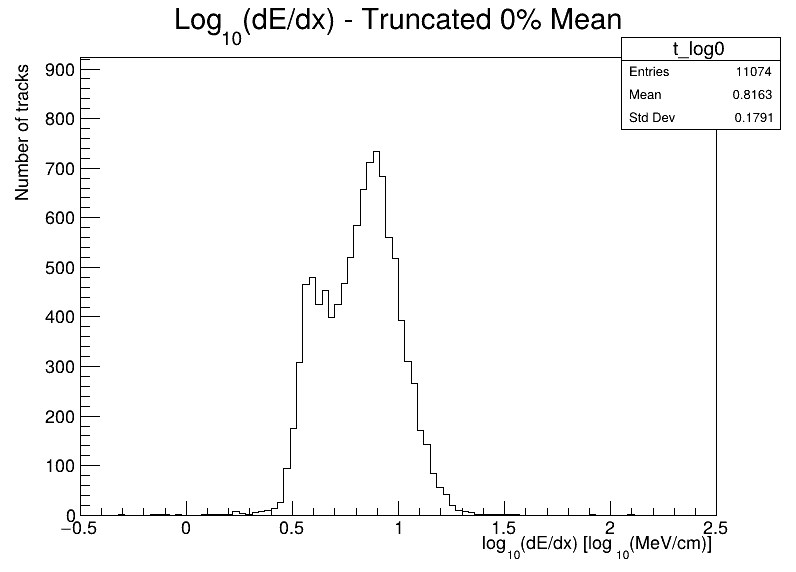

In [ ]:
# Log10 Truncated 0% Mean
c_t0_log = rt.TCanvas("t0_log_canvas", "Log10 Truncated 0% Mean", 800, 600)

t0_log = hists_trunc_log["t_log0"]
t0_log.SetLineColor(rt.kBlack)
t0_log.SetTitle("Log_{10}(dE/dx) - Truncated 0% Mean")
t0_log.GetXaxis().SetTitle("log_{10}(dE/dx) [log_{10}(MeV/cm)]")
t0_log.GetYaxis().SetTitle("Number of tracks")

# Enable statistics
rt.gStyle.SetOptStat("nemr")
t0_log.Draw("hist")

c_t0_log.Draw()

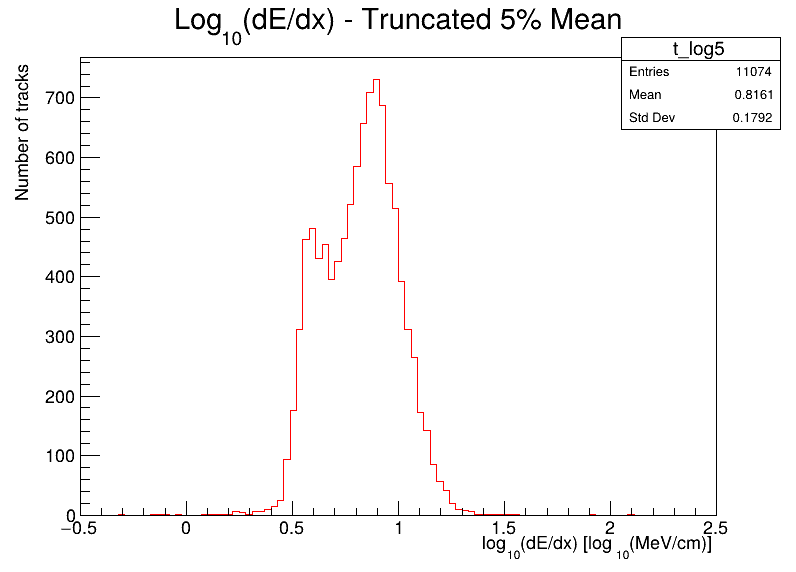

In [ ]:
# Log10 Truncated 5% Mean
c_t5_log = rt.TCanvas("t5_log_canvas", "Log10 Truncated 5% Mean", 800, 600)

t5_log = hists_trunc_log["t_log5"]
t5_log.SetLineColor(rt.kRed)
t5_log.SetTitle("Log_{10}(dE/dx) - Truncated 5% Mean")
t5_log.GetXaxis().SetTitle("log_{10}(dE/dx) [log_{10}(MeV/cm)]")
t5_log.GetYaxis().SetTitle("Number of tracks")

# Enable statistics
rt.gStyle.SetOptStat("nemr")
t5_log.Draw("hist")

c_t5_log.Draw()

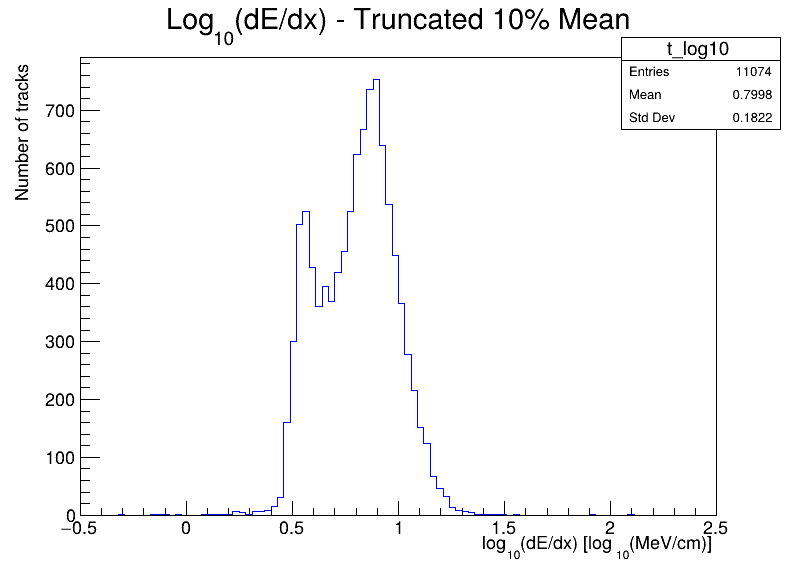

In [ ]:
# Log10 Truncated 10% Mean
c_t10_log = rt.TCanvas("t10_log_canvas", "Log10 Truncated 10% Mean", 800, 600)

t10_log = hists_trunc_log["t_log10"]
t10_log.SetLineColor(rt.kBlue)
t10_log.SetTitle("Log_{10}(dE/dx) - Truncated 10% Mean")
t10_log.GetXaxis().SetTitle("log_{10}(dE/dx) [log_{10}(MeV/cm)]")
t10_log.GetYaxis().SetTitle("Number of tracks")

# Enable statistics
rt.gStyle.SetOptStat("nemr")
t10_log.Draw("hist")

c_t10_log.Draw()

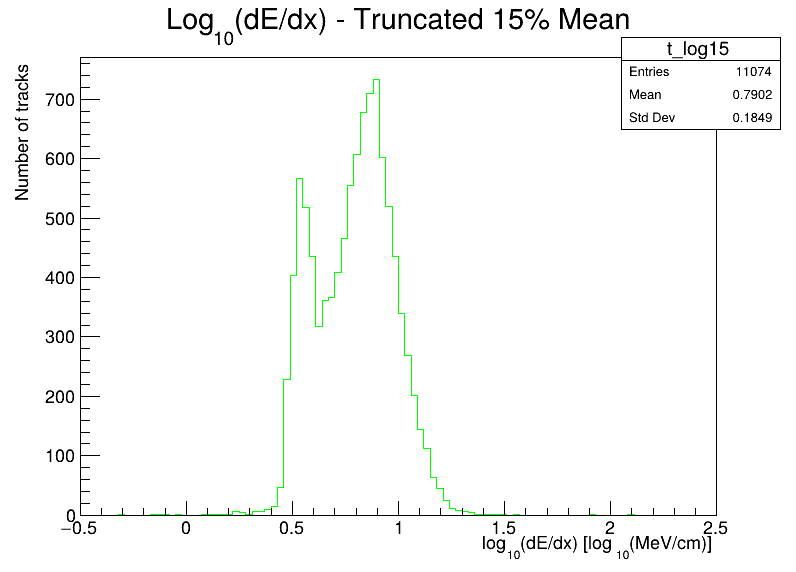

In [ ]:
# Log10 Truncated 15% Mean
c_t15_log = rt.TCanvas("t15_log_canvas", "Log10 Truncated 15% Mean", 800, 600)

t15_log = hists_trunc_log["t_log15"]
t15_log.SetLineColor(rt.kGreen)
t15_log.SetTitle("Log_{10}(dE/dx) - Truncated 15% Mean")
t15_log.GetXaxis().SetTitle("log_{10}(dE/dx) [log_{10}(MeV/cm)]")
t15_log.GetYaxis().SetTitle("Number of tracks")

# Enable statistics
rt.gStyle.SetOptStat("nemr")
t15_log.Draw("hist")

c_t15_log.Draw()

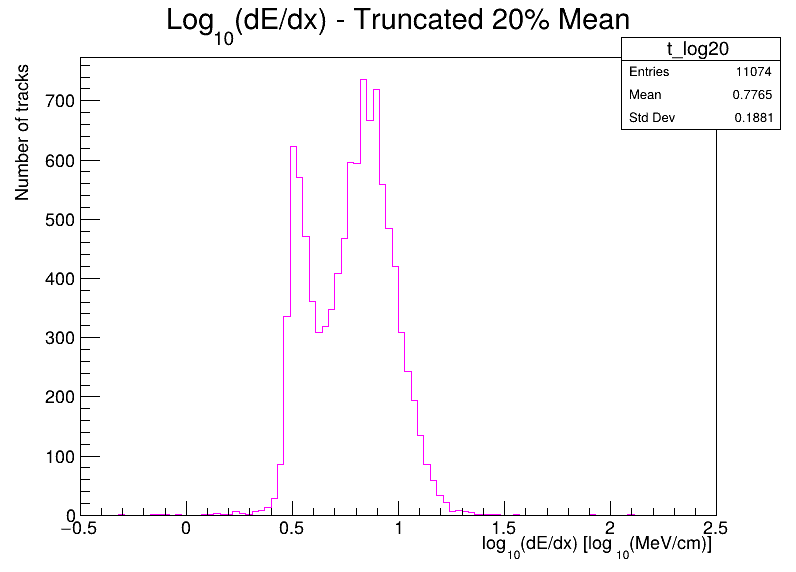

In [ ]:
# Log10 Truncated 20% Mean
c_t20_log = rt.TCanvas("t20_log_canvas", "Log10 Truncated 20% Mean", 800, 600)

t20_log = hists_trunc_log["t_log20"]
t20_log.SetLineColor(rt.kMagenta)
t20_log.SetTitle("Log_{10}(dE/dx) - Truncated 20% Mean")
t20_log.GetXaxis().SetTitle("log_{10}(dE/dx) [log_{10}(MeV/cm)]")
t20_log.GetYaxis().SetTitle("Number of tracks")

# Enable statistics
rt.gStyle.SetOptStat("nemr")
t20_log.Draw("hist")

c_t20_log.Draw()

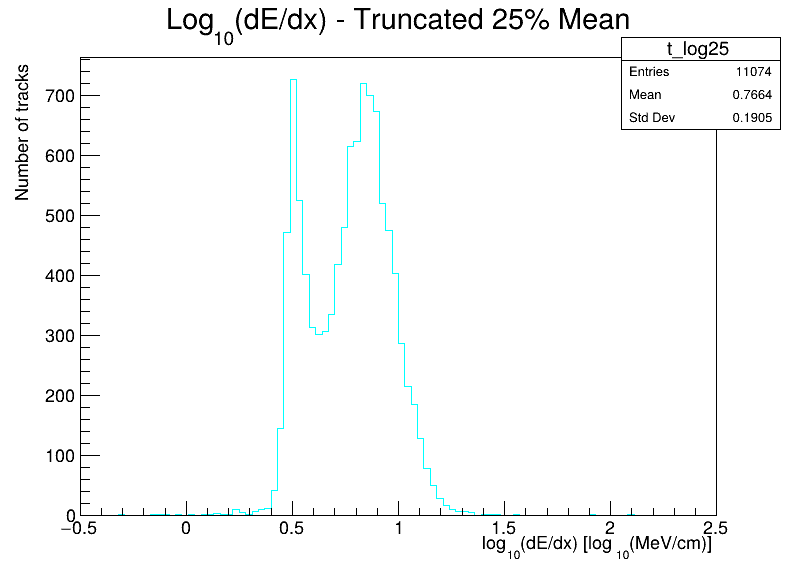

In [ ]:
# Log10 Truncated 25% Mean
c_t25_log = rt.TCanvas("t25_log_canvas", "Log10 Truncated 25% Mean", 800, 600)

t25_log = hists_trunc_log["t_log25"]
t25_log.SetLineColor(rt.kCyan)
t25_log.SetTitle("Log_{10}(dE/dx) - Truncated 25% Mean")
t25_log.GetXaxis().SetTitle("log_{10}(dE/dx) [log_{10}(MeV/cm)]")
t25_log.GetYaxis().SetTitle("Number of tracks")

# Enable statistics
rt.gStyle.SetOptStat("nemr")
t25_log.Draw("hist")

c_t25_log.Draw()

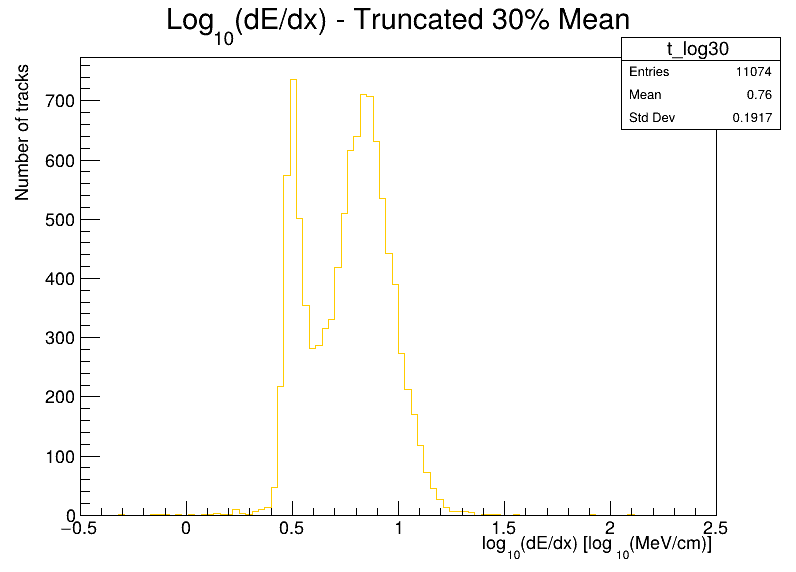

In [ ]:
# Log10 Truncated 30% Mean
c_t30_log = rt.TCanvas("t30_log_canvas", "Log10 Truncated 30% Mean", 800, 600)

t30_log = hists_trunc_log["t_log30"]
t30_log.SetLineColor(rt.kOrange)
t30_log.SetTitle("Log_{10}(dE/dx) - Truncated 30% Mean")
t30_log.GetXaxis().SetTitle("log_{10}(dE/dx) [log_{10}(MeV/cm)]")
t30_log.GetYaxis().SetTitle("Number of tracks")

# Enable statistics
rt.gStyle.SetOptStat("nemr")
t30_log.Draw("hist")

c_t30_log.Draw()

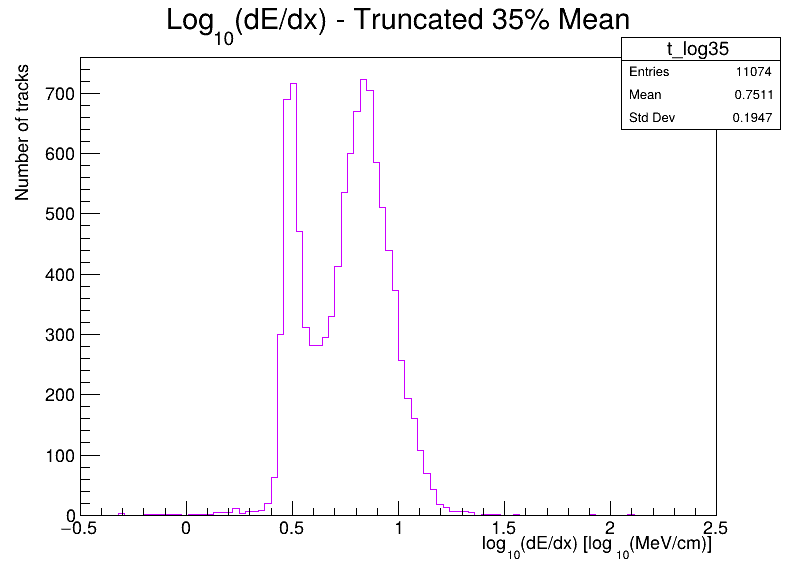

In [ ]:
# Log10 Truncated 35% Mean
c_t35_log = rt.TCanvas("t35_log_canvas", "Log10 Truncated 35% Mean", 800, 600)

t35_log = hists_trunc_log["t_log35"]
t35_log.SetLineColor(rt.kViolet)
t35_log.SetTitle("Log_{10}(dE/dx) - Truncated 35% Mean")
t35_log.GetXaxis().SetTitle("log_{10}(dE/dx) [log_{10}(MeV/cm)]")
t35_log.GetYaxis().SetTitle("Number of tracks")

# Enable statistics
rt.gStyle.SetOptStat("nemr")
t35_log.Draw("hist")

c_t35_log.Draw()

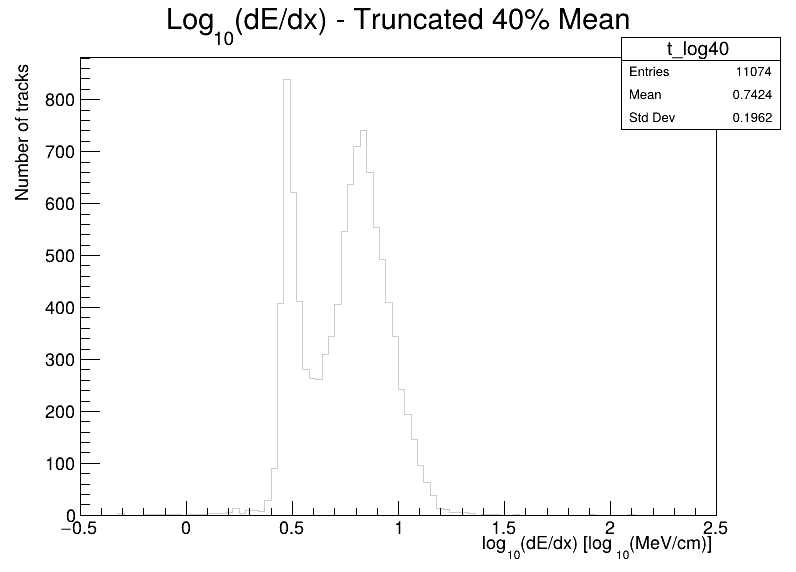

In [ ]:
# Log10 Truncated 40% Mean
c_t40_log = rt.TCanvas("t40_log_canvas", "Log10 Truncated 40% Mean", 800, 600)

t40_log = hists_trunc_log["t_log40"]
t40_log.SetLineColor(rt.kGray)
t40_log.SetTitle("Log_{10}(dE/dx) - Truncated 40% Mean")
t40_log.GetXaxis().SetTitle("log_{10}(dE/dx) [log_{10}(MeV/cm)]")
t40_log.GetYaxis().SetTitle("Number of tracks")

# Enable statistics
rt.gStyle.SetOptStat("nemr")
t40_log.Draw("hist")

c_t40_log.Draw()